In [3]:
# Load dataset from Googledrive
import os
Tomato_Dataset = "/content/drive/MyDrive/Tomoto - Mini"
print(os.listdir(Tomato_Dataset))

['train', 'valid']


In [4]:
# Understanding details of subcategory
Tomato_train = os.path.join(Tomato_Dataset,'train')
print(os.listdir(Tomato_train))
Tomato_valid = os.path.join(Tomato_Dataset,'valid')
print(os.listdir(Tomato_valid))

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy']
['Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Bacterial_spot']


In [5]:
# understanding the use of 'glob'
from glob import glob
Sub_folders_train = glob("/content/drive/MyDrive/Tomoto - Mini/train/*")
Sub_folders_valid = glob("/content/drive/MyDrive/Tomoto - Mini/valid/*")
Sub_folders_train

['/content/drive/MyDrive/Tomoto - Mini/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/Tomoto - Mini/train/Tomato___Early_blight',
 '/content/drive/MyDrive/Tomoto - Mini/train/Tomato___healthy']

Text(0.5, 1.0, 'Healthy leaf sample')

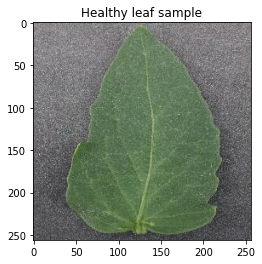

In [6]:
# showing sample image
import matplotlib.pyplot as plt
X = plt.imread("/content/drive/MyDrive/Tomoto - Mini/valid/Tomato___healthy/4ed0a372-fe3d-49a6-82a1-2e904e6c66e3___GH_HL Leaf 200.JPG")
plt.imshow(X)
plt.title('Healthy leaf sample')

In [7]:
from keras.layers import Input,Dense,Flatten,Lambda
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam
import numpy as np

In [8]:
# Define VGG16 parameters: preprocessing layers
IMAGE_SIZE = [224,224]
vgg = VGG16(include_top=False, weights='imagenet',input_shape=IMAGE_SIZE + [3])    

58892288/58889256 [==============================] - 0s 0us/step


In [9]:
# Condition for not repeating the training of existing weights (Mandate)
for layer in vgg.layers:
  layer.trainable = False

In [10]:
# output layer
x = Flatten()(vgg.output)
prediction = Dense(len(Sub_folders_train),activation='softmax')(x)

In [11]:
# Constructing model
model = Model(inputs=vgg.input,outputs=prediction)
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
# Image Augmentation # Defining Augmentation parameters:
train_datagen = ImageDataGenerator(rescale=1./255 , shear_range=0.2 , zoom_range=0.2 , horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
# Load the image
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Tomoto - Mini/train',target_size=(224,224),batch_size=32,class_mode='categorical')
valid_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Tomoto - Mini/valid',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 5548 images belonging to 3 classes.
Found 1386 images belonging to 3 classes.


In [13]:
# Train the model
Results =  model.fit(train_set,validation_data=valid_set,epochs=5,steps_per_epoch=len(train_set),validation_steps=len(valid_set))

Epoch 1/5
174/174 [==============================] - 1413s 8s/step - loss: 0.5786 - accuracy: 0.7843 - val_loss: 0.0918 - val_accuracy: 0.9711
Epoch 2/5
174/174 [==============================] - 89s 509ms/step - loss: 0.0960 - accuracy: 0.9720 - val_loss: 0.0559 - val_accuracy: 0.9848
Epoch 3/5
174/174 [==============================] - 88s 505ms/step - loss: 0.0566 - accuracy: 0.9835 - val_loss: 0.0825 - val_accuracy: 0.9704
Epoch 4/5
174/174 [==============================] - 87s 502ms/step - loss: 0.0488 - accuracy: 0.9846 - val_loss: 0.0469 - val_accuracy: 0.9841
Epoch 5/5
174/174 [==============================] - 87s 501ms/step - loss: 0.0409 - accuracy: 0.9877 - val_loss: 0.0458 - val_accuracy: 0.9863


<function matplotlib.pyplot.show>

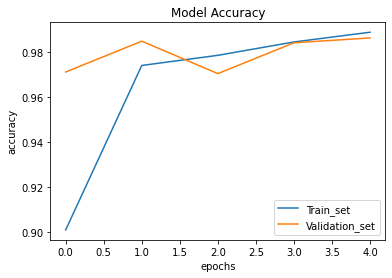

In [14]:
# Diagnose curves :for accuracy
import matplotlib.pyplot as plt
plt.plot(Results.history['accuracy'])
plt.plot(Results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train_set','Validation_set'], loc='lower right')
plt.show

<function matplotlib.pyplot.show>

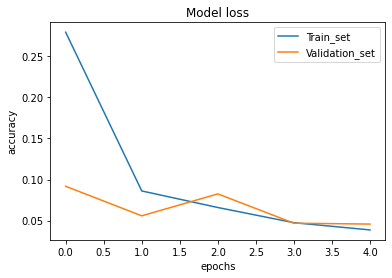

In [15]:
# Diagnose curves # for loss
plt.plot(Results.history['loss'])
plt.plot(Results.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train_set','Validation_set'], loc='upper right')
plt.show

In [27]:
valid_loss, valid_accuracy = model.evaluate(valid_set, steps=len(valid_set))
print(f"Final test accuracy: {valid_accuracy*100:.2f}%")

44/44 [==============================] - 17s 391ms/step - loss: 0.0482 - accuracy: 0.9820
Final validation accuracy: 98.20%


In [28]:
loss, accuracy = model.evaluate(train_set, steps=len(train_set))
print(f"Train_ accuracy: {accuracy*100:.2f}%")

174/174 [==============================] - 71s 405ms/step - loss: 0.0284 - accuracy: 0.9926
Train_ accuracy: 99.26%


In [29]:
model.save('Tomato leaf disease mini dataset - image classification .h5')